<a href="https://colab.research.google.com/github/harishahamed26/Car-pole-Reinforcement-Learning/blob/main/PredictionChallenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeleton Code for Prediction Challenge 3
Below is partial code to get you started on prediction challenge 3. You need to select values for the parameters that have question marks.

In [1]:
!pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 1.6 MB/s eta 0:00:00


In [2]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)
     

import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy # import the policy
from rl.agents.dqn import DQNAgent   


/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [14]:
from keras.layers.regularization.dropout import Dropout
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))


model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_11 (Dense)            (None, 16)                80        
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 dense_16 (Dense)            (None, 512)              

In [15]:
memory = SequentialMemory(limit=10000 ,window_length=1)

policy =  LinearAnnealedPolicy(inner_policy= EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1.,
                               value_min=.1, 
                               value_test=.05,
                               nb_steps=20000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=0.001, 
               policy=policy) 

dqn.compile(Adam(lr = 0.001), metrics=['mae'])

history = dqn.fit(env, nb_steps=20000, visualize=False, verbose=2)



/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 20000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.9/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)

    65/20000: episode: 1, duration: 2.873s, episode steps:  65, steps per second:  23, episode reward: 65.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.492 [0.000, 1.000],  loss: 0.075998, mae: 0.563865, mean_q: 0.933226, mean_eps: 0.998313
    80/20000: episode: 2, duration: 0.173s, episode steps:  15, steps per second:  87, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.600 [0.000, 1.000],  loss: 0.000998, mae: 0.530354, mean_q: 1.039621, mean_eps: 0.996760
    91/20000: episode: 3, duration: 0.146s, episode steps:  11, steps per second:  76, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 0.000961, mae: 0.534018, mean_q: 1.045076, mean_eps: 0.996175
   108/20000: episode: 4, duration: 0.190s, episode steps:  17, steps per second:  90, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.353 [0.000, 1.000],  loss: 0.000937, mae: 0.540306, mean_q: 1.062428, mean_ep

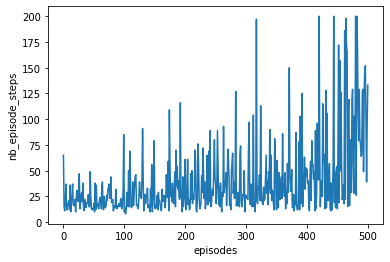

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [16]:
# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()


dqn.test(env, nb_episodes=20, visualize=False)